In [3]:
#Load Libraries,
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Load data
df = pd.read_csv (r'C:\Users\14372\Documents\PythonData1200\swiss1.csv')
df.head()

,Location,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [8]:
#Drop Location
df2=df.drop('Location',axis=1)
df2.head()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6


In [9]:
#Overview of DF2 info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fertility        47 non-null     float64
 1   Agriculture      47 non-null     float64
 2   Examination      47 non-null     int64  
 3   Education        47 non-null     int64  
 4   Catholic         47 non-null     float64
 5   InfantMortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.3 KB


In [10]:
#Summary of N/A values
df2.isnull().sum()

Fertility          0
Agriculture        0
Examination        0
Education          0
Catholic           0
InfantMortality    0
dtype: int64

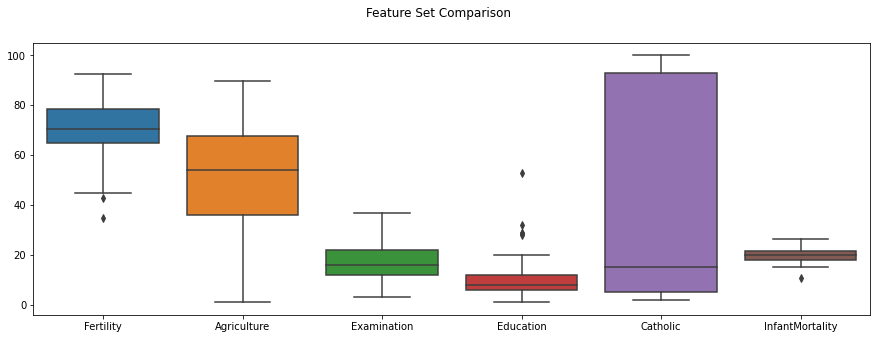

In [11]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=df)
plt.show()

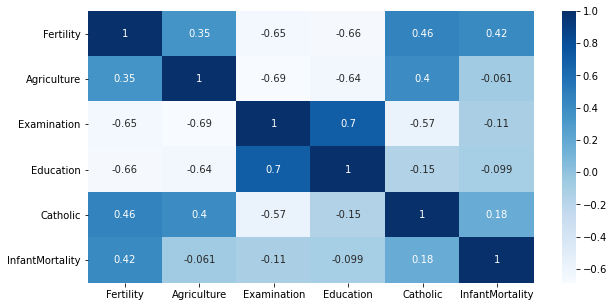

In [13]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True,cmap="Blues")

In [17]:
#Find Independent Column Correlations above 0.6
def correlation(dataset,threshold):
    col_corr= [] # correlated columns list 
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(df2,0.6)
print('Correlated columns @ 0.6:', col)

Correlated columns @ 0.6: [('Examination', 'Fertility'), ('Examination', 'Agriculture'), ('Education', 'Fertility'), ('Education', 'Agriculture'), ('Education', 'Examination')]


In [18]:
#Find Independent Column Correlations above 0.8
def correlation(dataset,threshold):
    col_corr= [] # correlated columns list 
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(df2,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: []


In [19]:
#Create x and y variables
x = df2.drop('Fertility', axis=1).to_numpy()
Y = df2['Fertility'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 100) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.neighbors import KNeighborsRegressor

In [20]:
#Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=Y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_root_mean_squared_error',
                                                            cv=10, random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([0,10])
    plt.show()

k-NN Regressor Learning Curve


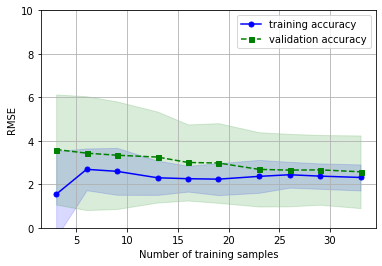

In [21]:
#Plot Learning Curve
print('k-NN Regressor Learning Curve')
plot_learning_curves(KNeighborsRegressor(2))

In [22]:
#Bias and Variance
from mlxtend.evaluate import bias_variance_decomp

#Script for Bias Variance
print('Bias Variance Trade-Off')
for name,method in[('kNN',KNeighborsRegressor(2))]:        
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        method, x_train2, Y_train, x_test2, Y_test, 
        loss='mse',
        random_seed=100)
    print('\nEstimator: {}'.format(name)) 
    print('Average Bias: {:.2f}'.format(avg_bias))
    print('Average Variance: {:.2f}'.format(avg_var))  

Bias Variance Trade-Off

Estimator: kNN
Average Bias: 34.54
Average Variance: 19.38


In [23]:
#Original Model - KNN

#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
from sklearn import metrics  

k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn_org = KNeighborsRegressor(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_org, x_train2, Y_train, cv=10, scoring='neg_root_mean_squared_error')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
#Print Best Score
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]

#Create Orginal KNN model
classifier_org = KNeighborsRegressor(n_neighbors = best_k)

#Fit KNN Model
classifier_org.fit(x_train2, Y_train)

#Prediction
y_pred_org = classifier_org.predict(x_test2)

print('Original Model')
print('\nn_neighbors:',str(best_k))
print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred_org)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred_org)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(Y_test, y_pred_org)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred_org))))  

Original Model

n_neighbors: 2

R2: 0.66
Mean Absolute Error: 5.33
Mean Squared Error: 39.24
Root Mean Squared Error: 6.26


In [24]:
#Gridsearch

from sklearn.model_selection import GridSearchCV

#k-NN Regression Model
knnreg2 = KNeighborsRegressor()
k_range = range(1, 10)
param_grid = { 
           'n_neighbors': k_range,
           'algorithm' : ['auto','ball_tree','kd_tree','brute'],
           'weights' : ['uniform','distance']}

knn_model = GridSearchCV(knnreg2, param_grid, cv=10, verbose=0,
                         scoring='neg_root_mean_squared_error')

grids = [knn_model] 
grid_dict = {0:'k-NN Regression Model'}

#Model Creation

#Create Heading
print('Optimized Model') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: {}'.format(grid_dict[idx])) 
     #Fit grid search
     optmodel.fit(x_train2, Y_train) 
     #Best params 
     print('\nBest params: {}'.format(optmodel.best_params_)) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
     # Test data accuracy of model with best params    
     print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred3)))
     print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred3)))  
     print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(Y_test, y_pred3)))  
     print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))))

Optimized Model

Estimator: k-NN Regression Model

Best params: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}

R2: 0.66
Mean Absolute Error: 5.33
Mean Squared Error: 39.24
Root Mean Squared Error: 6.26
